# Visualization with Matplotlib

1. Introduction
2. Simple plots - 1
3. Simple plots - 2
4. Advance plots
5. Customizing Plots
6. Multiple Subplots

## Introduction

`Matplotlib` is a multiplatform data visualization library built on `NumPy` `arrays`. `Matplotlib` supports numerous backends and output types, which means we can count on it to work regardless of the operating system we are using or the output format we desire. Let's install the package first:

In [1]:
package_name = "matplotlib"
package_name2 = "ipympl"

try:
    __import__(package_name)
    print(f"{package_name} is already installed.")
except ImportError:
    print(f"{package_name} not found. Installing...")
    %pip install {package_name}

try:
    __import__(package_name2)
    print(f"{package_name2} is already installed.")
except ImportError:
    print(f"{package_name2} not found. Installing...")
    %pip install {package_name2}

matplotlib is already installed.
ipympl is already installed.


Creating interactive plots within a Jupyter notebook can be accomplished using the `%matplotlib` command. Additionally, we have the option to embed graphics directly in the notebook using `inline` option:

In [2]:
#Interactive backend
#%matplotlib widget 
#Interactive backend
#%matplotlib ipympl
#Static backend
%matplotlib inline 

Just as we use the `np` shorthand for `NumPy`, we will use some standard shorthands for `Matplotlib` imports:

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt # a collection of functions that make matplotlib work like MATLAB
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid') #plt.style.use('seaborn-whitegrid')

We can choose the style we would like from the [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

Finally, if you're utilizing Google Colab along with the interactive backend, you must include the following line of code:

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

### Two interfaces for the `matplotlib`

A feature of `Matplotlib` that may cause confusion is its dual interfaces: a user-friendly <u>functional-style state-based interface</u> and a more powerful <u>object-oriented interface</u>. 

Firstly, we create the data we would like to plot. The simplest method, `plot()` accept two `arrays` (`x` and `y`) as inputs. It will plot `y` versus `x` as lines and/or markers.

In [5]:
x = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(x), np.sin(x)

`x` is now a array with 256 values ranging from $-\pi$ to $\pi$ (included). `C` is the cosine (256 values) and `S` is the sine (256 values).

#### Functional Interface

`Matplotlib` was initially developed as a `Python` alternative for `MATLAB` users, and many aspects of its syntax reflect this origin. The `MATLAB`-style tools can be found in the `pyplot` (`plt`) interface. 

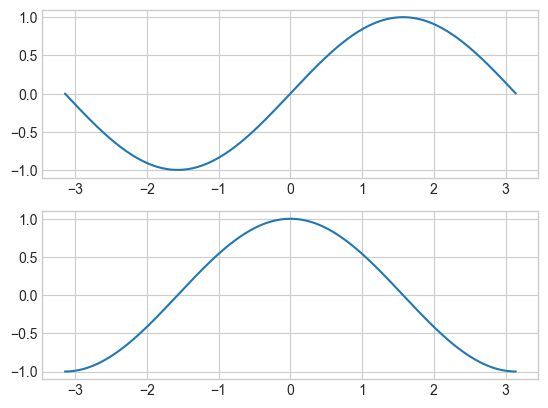

In [6]:
# 1. create a plot figure
plt.figure()
# 2. create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, S)
# 3. create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, C);  # It is stateful!

Note that the semicolon at the end of the last line is intentional: it suppresses the textual representation of the plot from the output.

It's crucial to understand that this interface is ***stateful***: it maintains information about the "current" figure and axes, which serve as the targets for all `plt` commands. We can obtain a reference to these by using the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) functions.

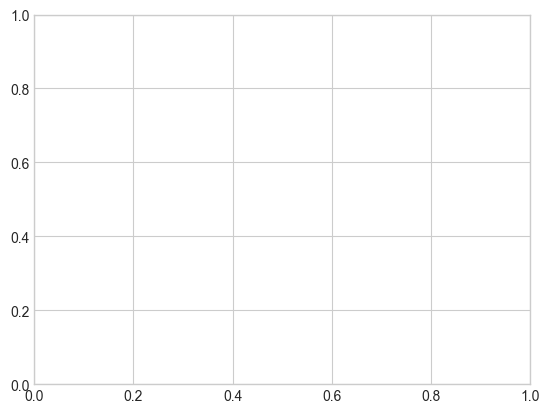

In [7]:
plt.gca();

Although the stateful interface is quick and convenient for basic plots, it can lead to difficulties. For instance, after creating the second panel, how can we return to the first one and add something? While this can be achieved using the MATLAB-style interface, it may be somewhat awkward. Thankfully, there is a more efficient solution.

#### Object-oriented interface

For more complex scenarios or when greater control over the figure is desired, the object-oriented interface comes in handy. Instead of relying on the concept of an "active" figure or axes, the object-oriented interface treats plotting functions as methods of explicit `Figure` and `Axes` objects.

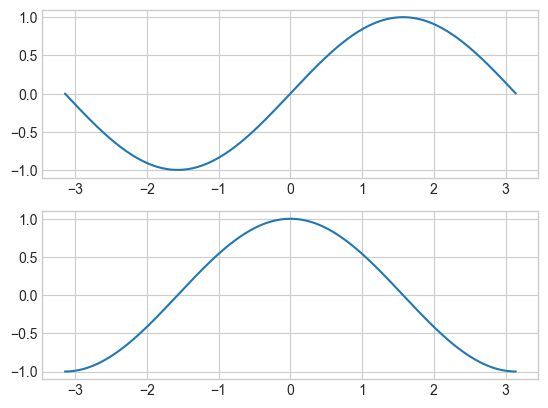

In [8]:
# 1. First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# 2. Call plot() method on the appropriate object
ax[0].plot(x, S)
ax[1].plot(x, C);

For basic plots, the choice between the two styles is mainly a matter of personal preference. However, as plots become more intricate, the object-oriented approach may be essential.

## Simple plots - 1

### Simple line plots

To create a 2D line plot, follow these general steps:

1. Call the `plt.figure()` to create a new figure. (optional for `%matplotlib inline`)
2. Generate a sequence of $x$ values usually using `linspace()`.
3. Generate a sequence of $y$ values usually by substitute the $x$ values into a function.
4. Input `plt.plot(x, y, [format], **kwargs)` where `[format]` is an (optional) format string, and `**kwargs` are (optional) keyword arguments specifying the line properties of the plot.
5. Utilize `plt` functions to enhance the figure with features such as a title, legend, grid lines, etc.
6. Input `plt.show()` to display the resulting figure (this step is optional in a Jupyter notebook).

Let's begin with a basic example where we try plotting the parabola 
 using 5 points:

Please be aware that when utilizing the interactive backend, it's necessary to include `plt.figure()` in each cell where a new plot is to be created.

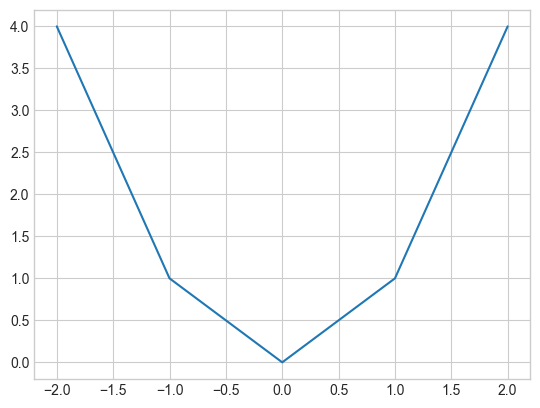

In [9]:
x = [-2,-1,0,1,2]
y = [4,1,0,1,4]

plt.plot(x,y);

The sequences `x` and `y` determine the coordinates of the points in the plot and the line is formed by connecting these points with straight lines.

The second observation suggests that if we aim to display a smooth curve, we need to plot numerous points; otherwise, the plot will not appear smooth. Let's attempt this again, using the `NumPy` function `np.linspace()` to create 200 points:

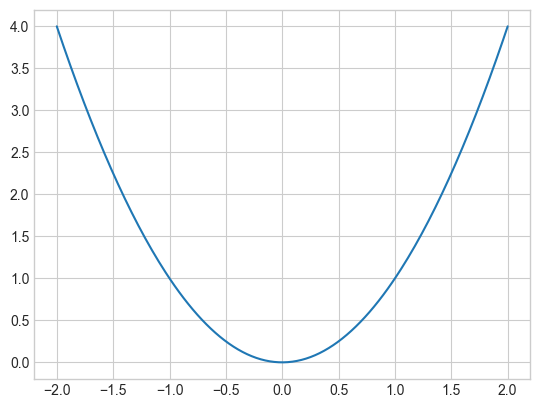

In [10]:
x = np.linspace(-2,2,200)
y = x**2
plt.plot(x,y);

Looks much better!

Let's try another example with a simple sinusoid:

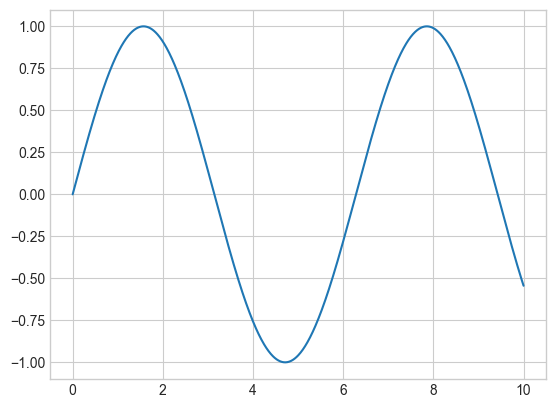

In [11]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x)); # let the figure and axes be created for us in the background

If we want to create a single figure with multiple lines, we can simply call the `plot()` function multiple times:

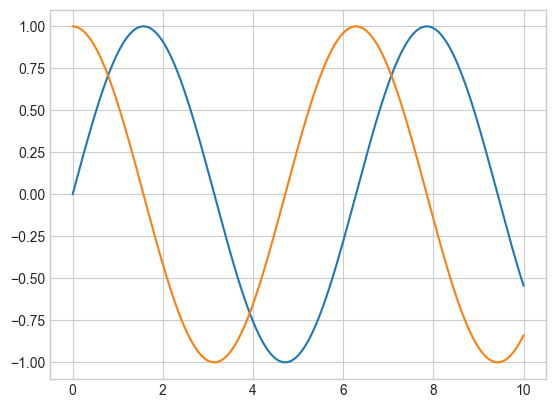

In [12]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

#### Adjusting the plot: Line colors, styles and widths

One of the first modifications you might want to make to a plot is adjusting the line colors and styles. The `plt.plot()` function accepts additional arguments that can be employed to define these aspects. To change the color, you can use the `color` keyword:

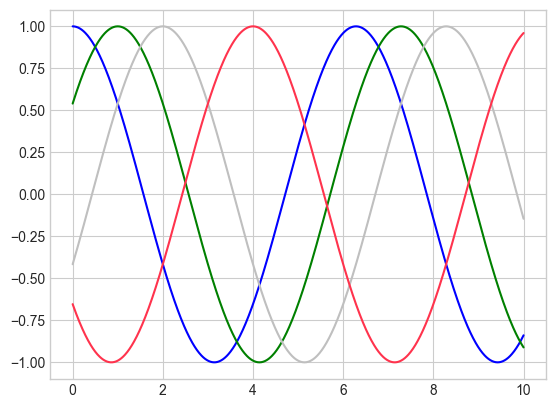

In [13]:
plt.plot(x, np.cos(x - 0), color='blue')         # specify color by name
plt.plot(x, np.cos(x - 1), color='g')            # short color code (rgbcmyk)
plt.plot(x, np.cos(x - 2), color='0.75')         # grayscale between 0 and 1
plt.plot(x, np.cos(x - 4), color=(1.0,0.2,0.3)); # RGB tuple, values 0 to 1

Similarly, the line style can be adjusted using the `linestyle` keyword:

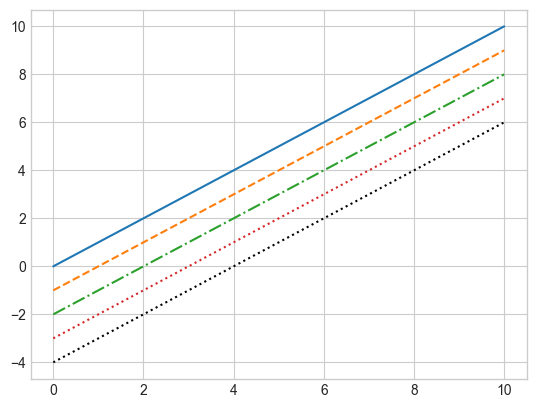

In [14]:
plt.plot(x, x - 0, linestyle='-')  # solid
plt.plot(x, x - 1, linestyle='--') # dashed
plt.plot(x, x - 2, linestyle='-.') # dashdot
plt.plot(x, x - 3, linestyle=':')  # dotted
plt.plot(x, x - 4, ':k');          # (use format string here!)
# You can save some keystrokes by combining these linestyle and color codes into a single non-keyword argument

Finally, you can also adjust the width using `linewidth` keyword:

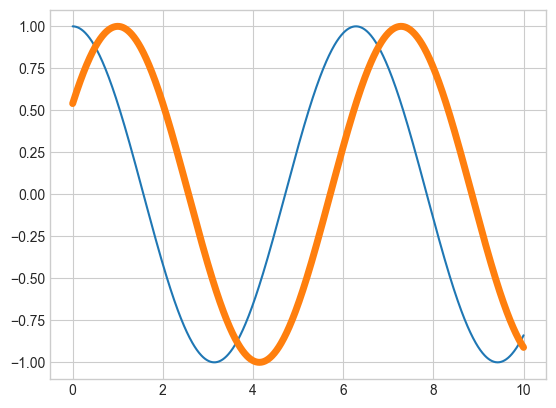

In [15]:
plt.plot(x, np.cos(x - 0)) 
plt.plot(x, np.cos(x - 1), linewidth='5');

#### Adjusting the plot: Axes limits

`Matplotlib` generally provides suitable default axes limits for your plot, but in certain cases, having more control can be advantageous. The simplest method to fine-tune the limits is by utilizing the `plt.xlim()` and `plt.ylim()` functions:

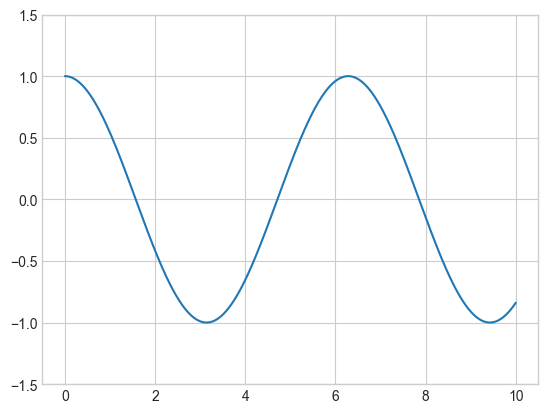

In [16]:
plt.plot(x, np.cos(x))

plt.xlim(-0.5, 10.5)
plt.ylim(-1.5, 1.5);

#### Labeling plots

Let's take a quick look at labeling plots. Titles and axis labels are the most basic types of labels — there are methods available to set them quickly. 

Moreover, when multiple lines appear within a single set of axes, a plot legend can be helpful in labeling each line type. Once again, `Matplotlib` has a built-in method for swiftly creating such a legend, achieved through the `plt.legend()` method:

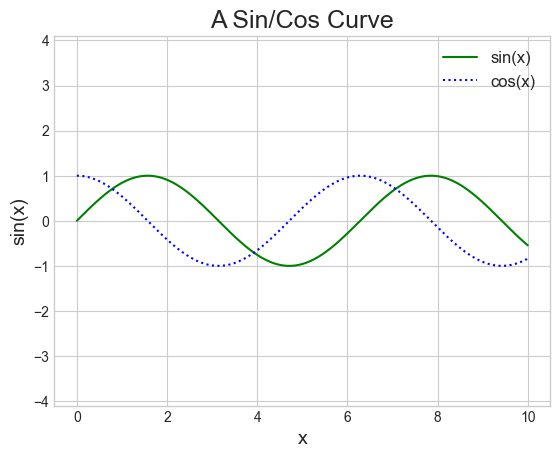

In [17]:
plt.plot(x, np.sin(x), '-g', label='sin(x)') # solid green line
plt.plot(x, np.cos(x), ':b', label='cos(x)') # dotted blue line
plt.title("A Sin/Cos Curve", fontsize=18)    # we can also specify the font size
plt.xlabel("x", fontsize=14)
plt.ylabel("sin(x)", fontsize=14)
plt.legend(fontsize=12)
plt.axis('equal');

Note that we also use the function `plt.axis('equal')` to force the scaling to be equal on both axes. In addition, the `plt.legend()` function keeps track of the line style and color, and matches these with the correct label!

For more anatomy of a figure, you can refer to the following figure (which is created using the code available [here](https://matplotlib.org/stable/gallery/showcase/anatomy.html)):

<center><img src="https://drive.google.com/uc?id=1zKJuabAWhclAXqLNr-usOpQC_WRiFgnP" width="40%" height="40%"></center>

#### `Matplotlib` tips

While many `plt` functions (Functional interface) have direct `ax` method (OOP interface) equivalents (`plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()`, etc.), this does not apply to all commands. Specifically, functions for setting limits, labels, and titles undergo slight modifications. To transition between MATLAB-style functions and object-oriented methods, implement the following changes:

<div align="center">

|  Functional |      OOP      |
|:-----------:|:-------------:|
| plt.xlabel()  | ax.set_xlabel() |
|  plt.ylabel() | ax.set_ylabel() |
|   plt.xlim()  |  ax.set_xlim()  |
|   plt.ylim()  |  ax.set_ylim()  |
|  plt.title()  |  ax.set_title() |

</div>

## Exercise 1: Try to plot the function $\frac{1}{x(x-1)}$ within the range -2 to 3 with evenly spaced points. Try to set the point at the discontinuity to `np.nan` so that the point won't be plotted in the figure for better visualization purposes.

Hint: You can use `np.close(x, discontinuity, atol=threshold)` function to find the index of the point closest to the discontinuity. On the other hand `y[y>threshold]; y[y<-threshold]` may also be used.

In [ ]:
# Your code here

## Simple plots - 2

### Simple scatter plots

Another frequently used plot type is the basic scatter plot. In this case, points are depicted individually with a dot, circle, or other shape, rather than being connected by line segments. It turns out that the same function can also generate scatter plots:

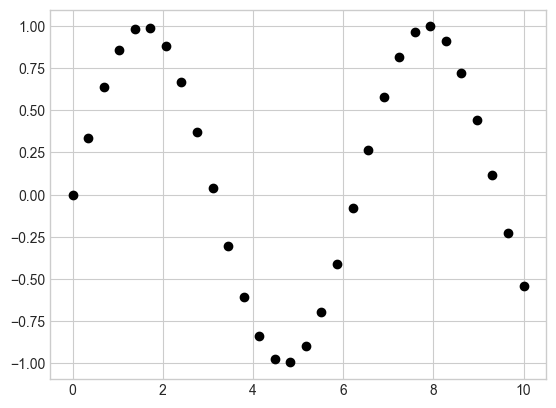

In [19]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character representing the type of symbol used for plotting. Similar to specifying options like '-' or '--' to control the line style, marker styles also have their own set of brief string codes:

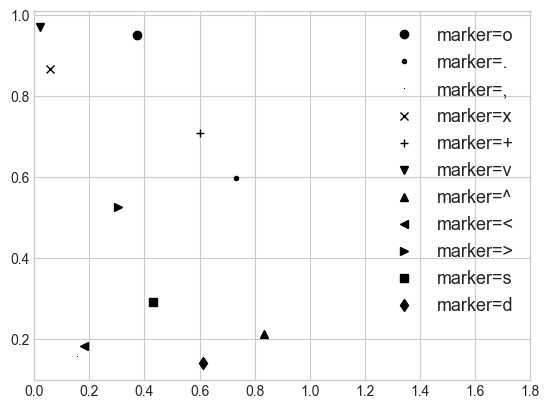

In [20]:
np.random.seed(42)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(np.random.random(1), np.random.random(1), marker, color='black', label=f'marker={marker}')

plt.legend(fontsize=13)
plt.xlim(0, 1.8);

For even greater versatility, these character codes can be combined with line and color codes to plot points accompanied by a connecting line. Furthermore, the size or color of the markers can be customized:

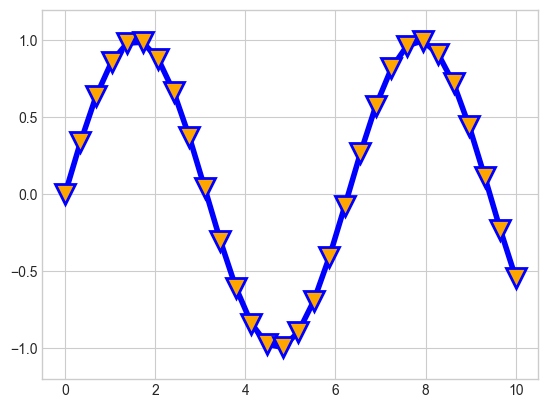

In [21]:
plt.plot(x, y, '-vb', markersize=15, linewidth=4, markerfacecolor='orange', markeredgewidth=2)
plt.ylim(-1.2, 1.2);

#### Scatter Plots with `plt.scatter()`

The main advantage of `plt.scatter()` over `plt.plot()` is its ability to generate scatter plots **where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data**. 

To demonstrate this, let's create a random scatter plot with points of various colors and sizes. To better visualize the overlapping points, we'll also use the `alpha` keyword to adjust the transparency level:

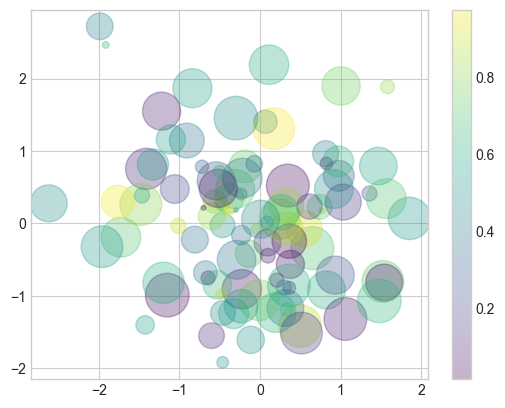

In [22]:
np.random.seed(42)
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

Observe that the `color` argument is automatically mapped to a color scale (demonstrated here by the `colorbar()` command). Moreover, we can choose a color map using the `cmap` keyword. To view all `Matplotlib` color maps, refer to the [list of colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

### Density plots

#### Histograms, binnings, and density plots

A basic histogram can be an excellent initial step in comprehending a dataset. We can use `plt.hist()` to calculate and generate a histogram of sample data:

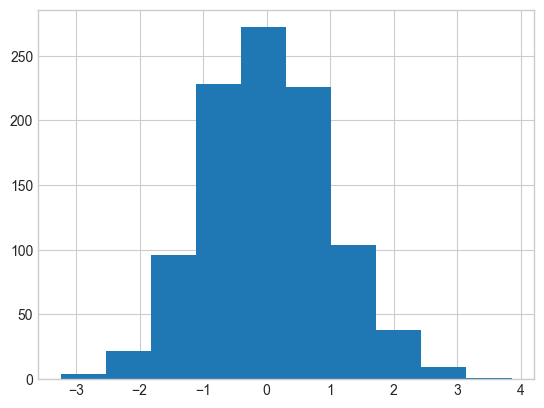

In [23]:
np.random.seed(42)
data = np.random.normal(size=1000)
plt.hist(data);

The `hist()` function provides numerous options for fine-tuning both the computation and display. Here's an example of a more customized histogram:

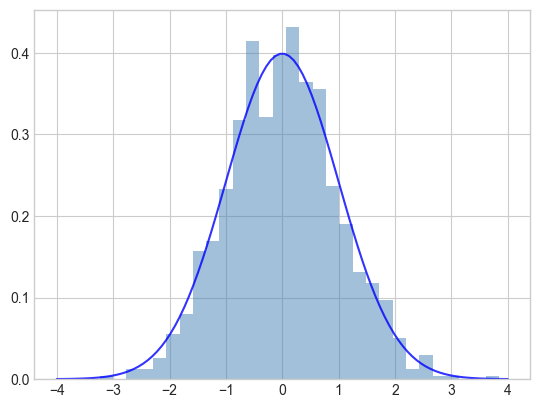

In [24]:
plt.hist(data, bins=30, density=True, alpha=0.5, color='steelblue', edgecolor='none')
x = np.linspace(-4,4,100)
y = 1/(2*np.pi)**0.5 * np.exp(-x**2/2)
plt.plot(x,y,'b',alpha=0.8);

The `density=True` keyword argument normalizes the histogram and displays it on the same axes as the data. The `bins` keyword argument specifies the number of bins to use for the histogram. Here, we also superimpose the normal distribution $y = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$.

## Exercise 2: Try to plot the function $\sin(x)/x$ within the range -10 to 10 with evenly spaced 200 points using the solid blue line. Use both the visual inspection and the following code to check the value of the function when x approaches 0.

```python
# Find the x coordinates closest to 0 using isclose() and masking
x[np.isclose(x, 0, atol=1e-01)]
y[np.isclose(x, 0, atol=1e-01)]
```

Finally, plot the above points with red circle markers on the same plot.

In [ ]:
# Your code here

## Advance plots

### Filling the area between lines

Sometimes, it may be useful to fill areas between plots using `plt.fill_between()`:

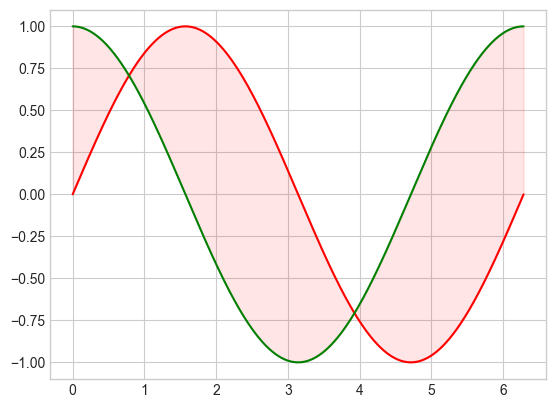

In [26]:
x = np.linspace(0, 2*np.pi, 1000)

plt.plot(x, np.sin(x), 'r')
plt.plot(x, np.cos(x), 'g')
plt.fill_between(x, np.cos(x), np.sin(x), color='red', alpha=0.1);

### Plot in polar coordinate

To plot the figure in different coordinate system, we can use `projection` option of the `plt.axes()` method:

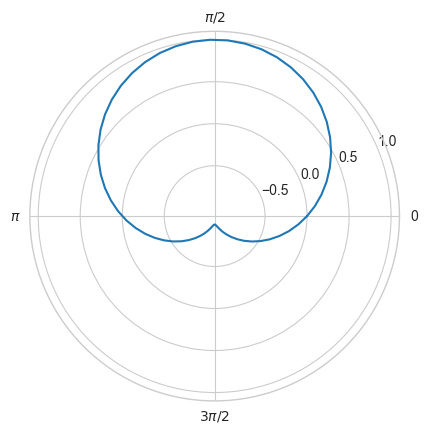

In [27]:
t = np.linspace(0, 2*np.pi, 64)
# plot in polar coordinates
plt.axes(projection='polar')
plt.plot(t, np.sin(t), '-');
# Set ticks for polar coordinate
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$'])
plt.yticks([-0.5,0,0.5,1]);

Note that we would expect that a radius of 0 designates the origin, and a negative radius is reflected across the origin; Specifically, the polar coordinates $(r, t)$ and $(-r, t+\pi)$ should represent the same point. To implement this behavior, use the code below:

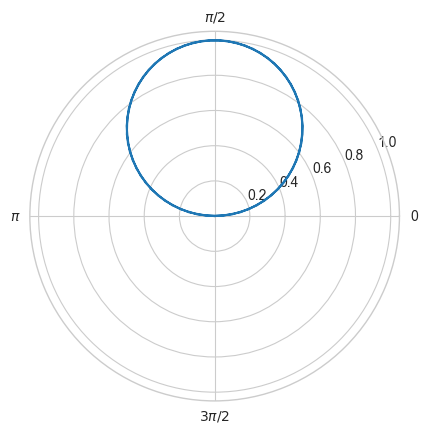

In [28]:
t = np.linspace(0, 2*np.pi, 64)
r = np.sin(t)
# plot in polar coordinates
plt.axes(projection='polar')
plt.plot(t+(r<0)*np.pi, np.abs(r), '-')
# Set ticks for polar coordinate
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$']);

## Example 1: Try to plot the $\sin(2x)$ function in the range $x = [-\pi, \pi]$ and fill the area between the curve and the x-axis with the color `blue` and `alpha=0.25` as follows

You can use the following code to set the ticks:

```python
radian_multiples = [-1, -1/2, 0, 1/2, 1]
radians = [n * np.pi for n in radian_multiples]
radian_labels = ['$\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$']
plt.xticks(radians, radian_labels);
```

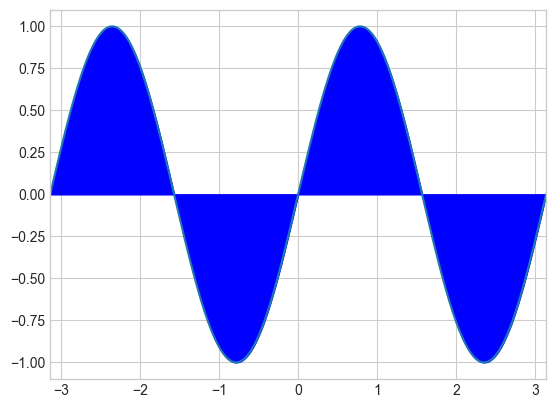

In [38]:
# Example plot:

In [ ]:
# Your code here

## Customizing Plots

### Customizing plot legends

Plot legends provide context to a visualization, attributing meaning to the various plot elements. For instance, we can designate the location and display the frame:

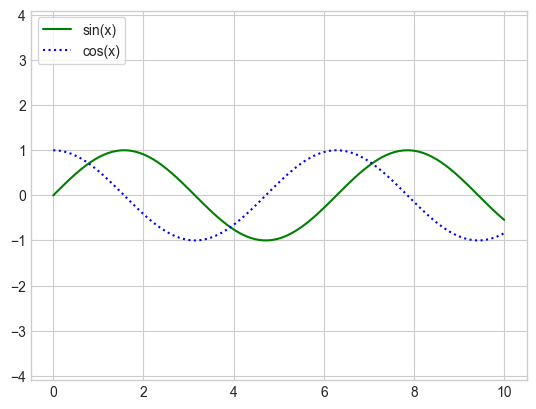

In [31]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc='upper left', frameon=True);

#### Text and Annotation

Making a good graph or chart means guiding the viewer so that the figure tells a story. Sometimes, this story can be told just through the figure, without needing extra words. But other times, we need to add small pieces of text and labels to help explain the image. The most basic text we'll use are labels for the axes and titles for the chart.

When visualizing data, it's frequently beneficial to annotate particular features of the plot to attract the viewer's attention. This can be done manually using the `plt.text()` function, which positions text at a specified x/y value. Furthermore, we can use the `plt.annotate()` function, which generates text and an arrow and enables the arrows to be specified with great flexibility.

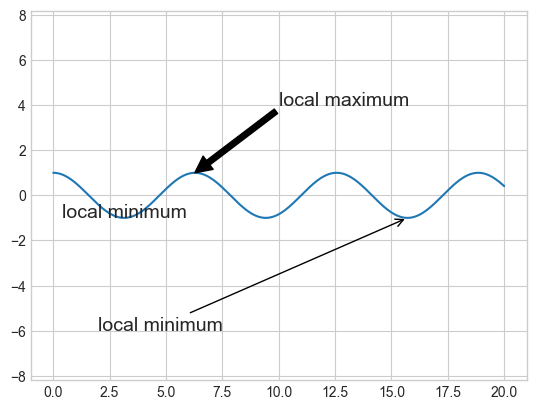

In [32]:
plt.figure() 
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')

plt.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black'), fontsize=14)
plt.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), arrowprops=dict(arrowstyle="->"), fontsize=14)
plt.text(3.14, -1, 'local minimum', fontsize=14, ha='center'); # (x, y, text)

The arrow style is controlled through the `arrowprops` dictionary, which has numerous options available.

#### Customizing ticks and spines

`Matplotlib`'s default tick locators and formatters are generally sufficient for many common situations but are not optimal for every plot. Within each axis, there are major tick marks and minor tick marks.

As the names suggest, major ticks are typically more prominent or larger, while minor ticks are usually smaller. You can modify the ticks using the `xticks()` and `yticks()` functions. The first argument is a list of tick locations, and the second argument is a list of tick labels:

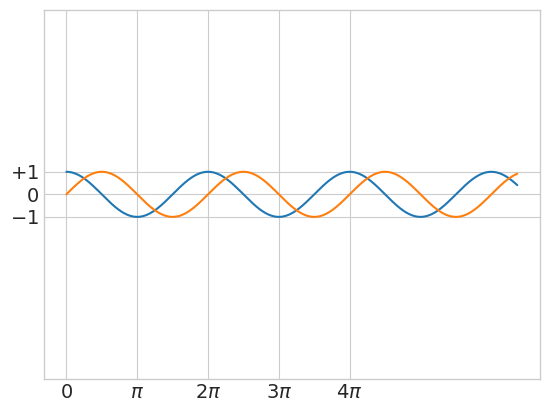

In [33]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))
plt.axis('equal')
# Set the ticks and tick labels
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi],
           [r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'], fontsize=14)
plt.yticks([-1, 0, +1],  [r'$-1$', r'$0$', r'$+1$'], fontsize=14);

***Spines*** are the lines connecting the axis tick marks and indicating the boundaries of the data area. They can be positioned at arbitrary locations, and by default, they are positioned at the borders of the axis. 

We'll change that and position them in the middle instead. Since there are four spines (top, bottom, left, and right), we'll remove the top and right spines and move the bottom and left spines to the center:

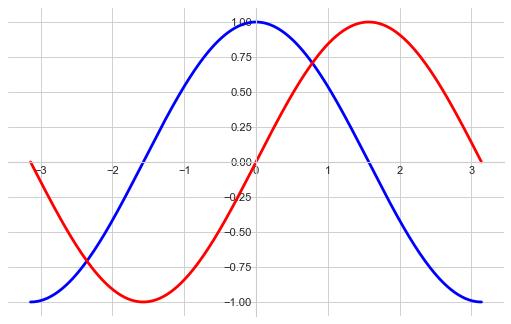

In [34]:
plt.figure(figsize=(8,5), dpi=80)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C = np.cos(X)
S = np.sin(X)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

Note that here we also use `plt.figure(figsize=(8,5), dpi=80)` to set the figure size and resolution.

## Multiple Subplots

Sometimes, it's helpful to look at different pieces of data next to each other. To do this, `Matplotlib` uses something called **subplots**. Subplots are basically smaller graphs that can live together in one bigger graph. These smaller graphs could be little graphs placed inside a larger one, a grid of many graphs, or they could be arranged in other more complicated ways.

### `plt.subplots()`

Aligned rows or columns of subplots are a common enough requirement that `Matplotlib` has several convenience routines that make it easy to create them. `plt.subplots()` is the easiest tool to use. Instead of creating a single subplot, **this function creates a complete grid of subplots in one line, and returns them as a `NumPy` array**. The arguments are the number of rows and the number of columns.

Let’s create a $2 \times 3$ grid of subplots, and adjust the spacing between them:

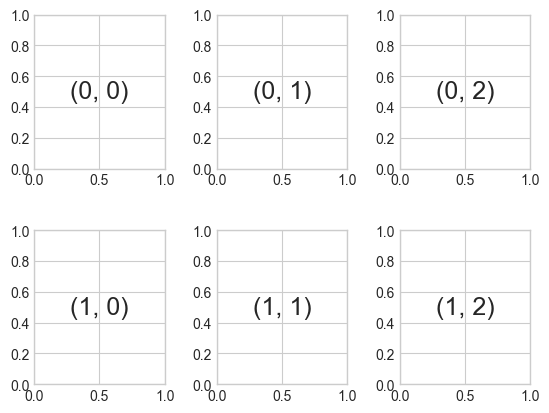

In [35]:
fig, ax = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center', va='center')

The command `plt.subplots_adjust()` can be used to adjust the spacing between subplots. We can then use the subplots to plot different figures:

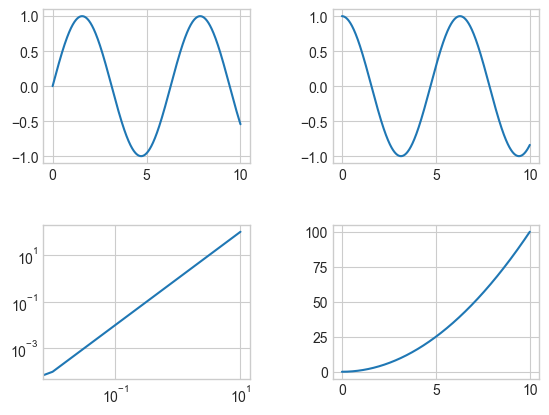

In [36]:
fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
x = np.linspace(0, 10, 1000)
ax[0,0].plot(x, np.sin(x))
ax[0,1].plot(x, np.cos(x))
ax[1,0].plot(x, x**2)
ax[1,0].set_xscale('log') # Set the scale to log scale
ax[1,0].set_yscale('log')
ax[1,1].plot(x, x**2);

In this case, the space is set to 40% of the subplot width and height.

In summary, `Matplotlib` is a data visualization library for creating visualizations in `Python`. It provides a wide variety of customizable plots, charts, and graphs, making it a powerful tool for data analysis and communication. With `Matplotlib`, we can create line plots, scatter plots, histograms, and many other types of visualizations. You can customize the appearance of your plots with a wide range of options, including color schemes, fonts, axes labels, and annotations. Refer to [https://matplotlib.org/cheatsheets/](https://matplotlib.org/cheatsheets/) for more details.

## References

1. [https://scipy-lectures.org/intro/matplotlib/index.html](https://scipy-lectures.org/intro/matplotlib/index.html)

2. [https://jakevdp.github.io/PythonDataScienceHandbook/#4.-Visualization-with-Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/#4.-Visualization-with-Matplotlib)

3. [https://matplotlib.org/stable/gallery/showcase/anatomy.html](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## Key terms

- **Functional-style Interface**: Also known as the Pyplot interface, this is the simpler way of creating plots in Matplotlib where you directly call plotting functions. It's called "functional-style" because it involves calling functions on the Pyplot module directly and it takes care of creating and managing figures and axes for you. 
- **Object-oriented Interface**: This interface is used when you need more control over your figure. Instead of letting Matplotlib handle what the current figure and axes is, you do it yourself. You create Figure and Axes objects and call methods on these objects to manipulate them directly. This makes it easier to create complex layouts and to reuse components.
- **Stateful**: Stateful refers to Matplotlib's ability to keep track of the current figure and axes, which are where all plt commands are applied. The interface is stateful because it stores the last created or modified figure and axes as the current one. This is what enables the Functional-style Interface to work.
- **Figure**: In Matplotlib, the whole window/page is called the Figure. It's the top-level component that contains all the elements of the plot. A Figure can have several other elements like Axes, Legends, and Titles, among others. 
- **Axes**: These are what you think of as 'a plot'. They are the area in which the data is plotted with functions and can have ticks, labels, etc., associated with it. A figure can contain multiple Axes objects, which can be placed in a grid-like format inside the Figure.
- **Line Plots**: Line plots are probably one of the most common types of graph. You can use it to visualize the relationship between any two sets of data. For example, you can plot a curve that represents the relationship between temperature (y-axis) and altitude (x-axis).
- **Legends**: Legends help in understanding the plot better. It's an area describing the elements of the graph. In the legend, there are labels along with the represented graphics (lines, points) which are used to depict what they represent in the plot.
- **Format String**: A format string in Matplotlib is a way to specify colors, markers, and line styles. A format string is a string that contains characters that represent different formatting actions. For example, 'bo-' represents a blue color, circle marker, and solid line style.
- **Scatter Plots**: Scatter plots’ primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.
- **Marker**: A "marker" in Matplotlib refers to the symbol used in a plot to represent a data point.
- **Colormaps**: Colormaps are used to map numerical data to colors in a graph, usually in a gradient-like way. They're used in creating plots like heatmaps or in plots where you'd want to show a gradient of colors. Matplotlib provides a lot of pre-made colormaps for use.
- **Density Plots**: A density plot is a graphical representation that uses a kernel density estimate to show the probability density function of a random variable. It is a smoothed version of the histogram and improves upon it by dealing with the noise in the data and providing a smooth curve.
- **Ticks**: Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string. Whenever we plot a graph, the axes adjust and take the default ticks. Matplotlib’s default ticks are generally sufficient in common situations but are in no way optimal for every plot.
- **Spines**: Spines are lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, were on the border of the axis. In other words, they are the simple lines that denote the boundaries of the plot area – they join the axis tick marks.
- **Subplots**: Sometimes we may wish to plot different types of plots (like a density plot, line plot, scatter plot) or multiple instances of the same plot but different data in a single figure. Subplots allow us to do that. They provide an option to plot multiple plots in a single figure. 